Dataset loaded successfully!

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

/tmp/ipython-input-6-461766004.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-6-461766004.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

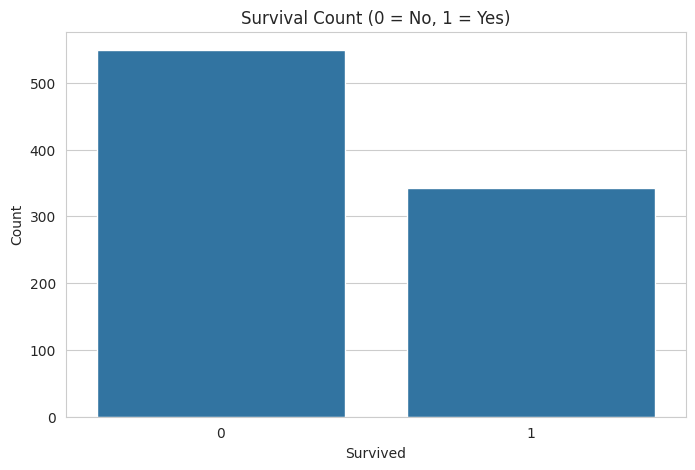

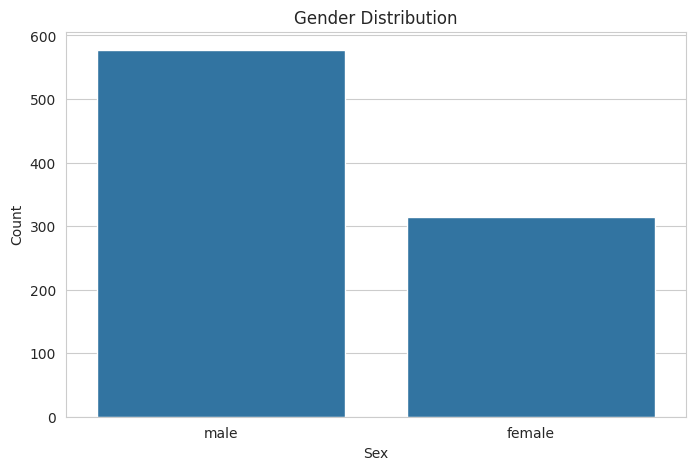

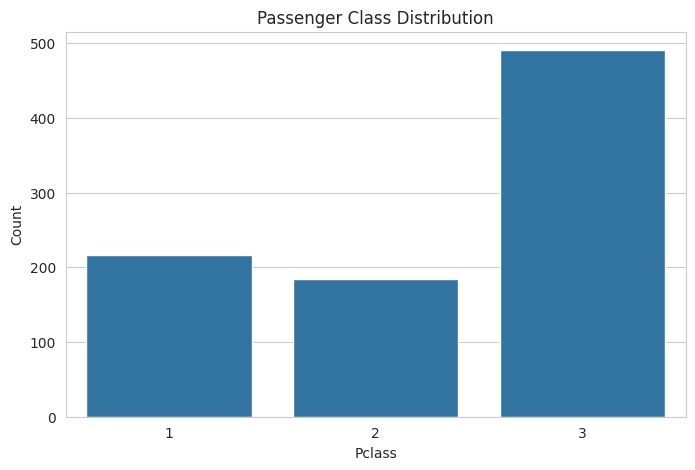

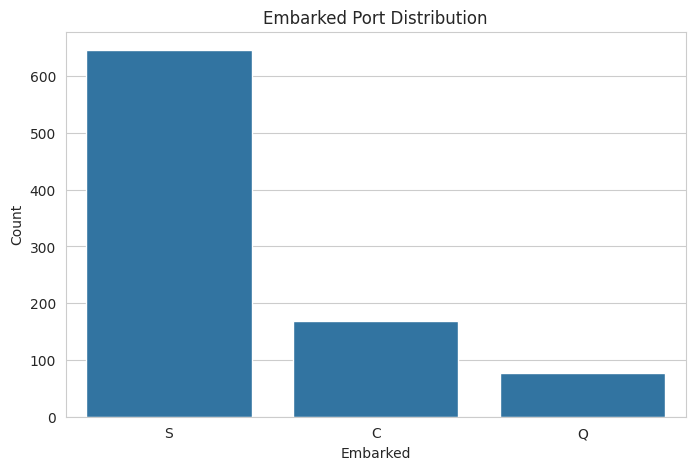

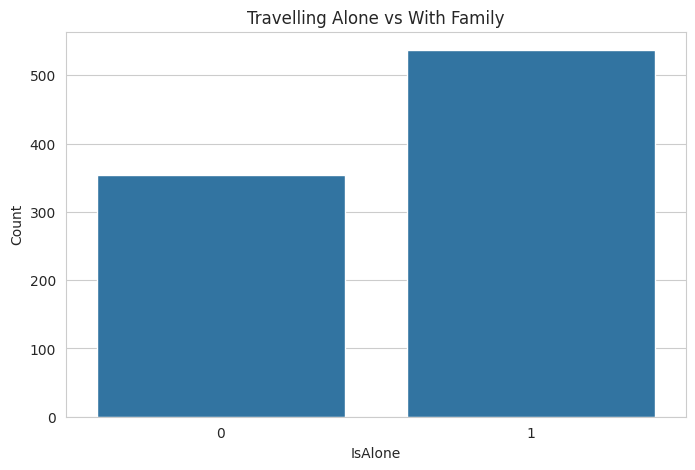

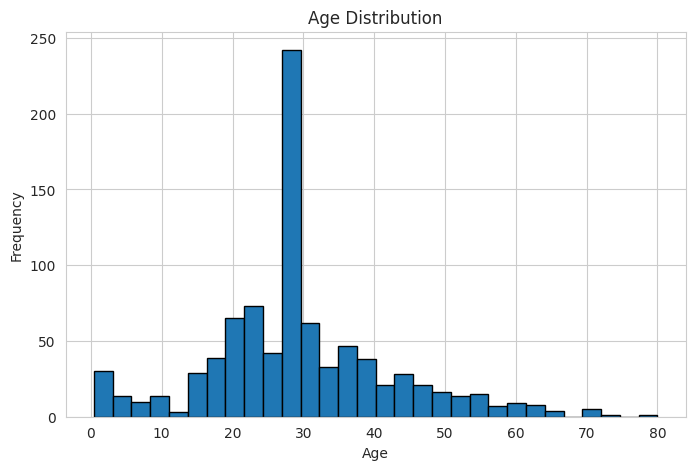

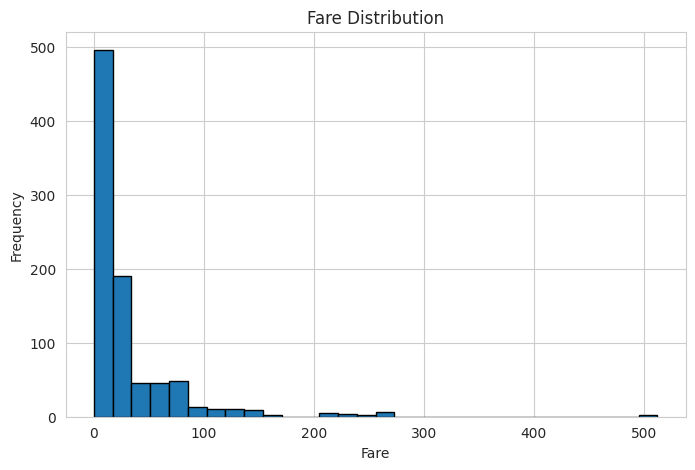

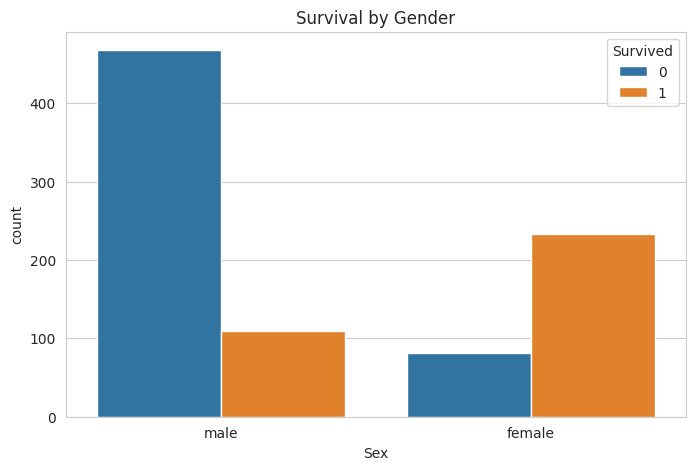

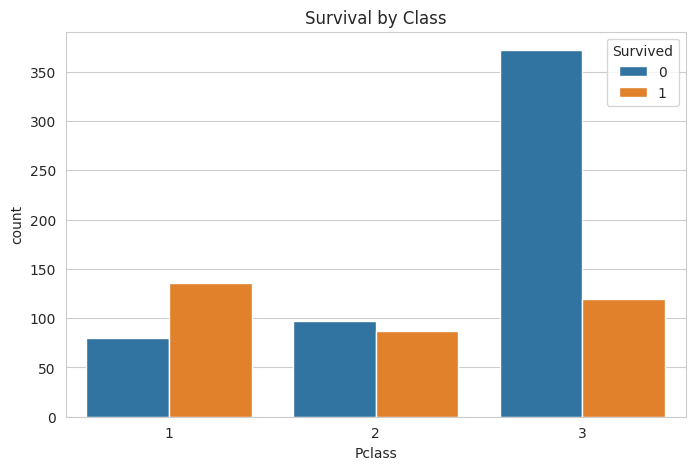

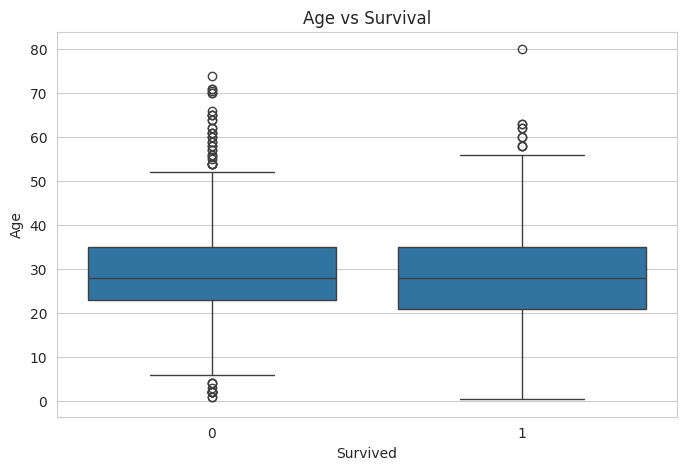

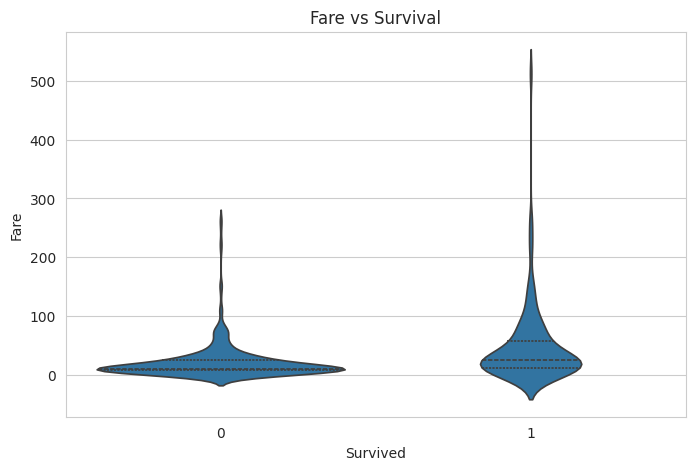

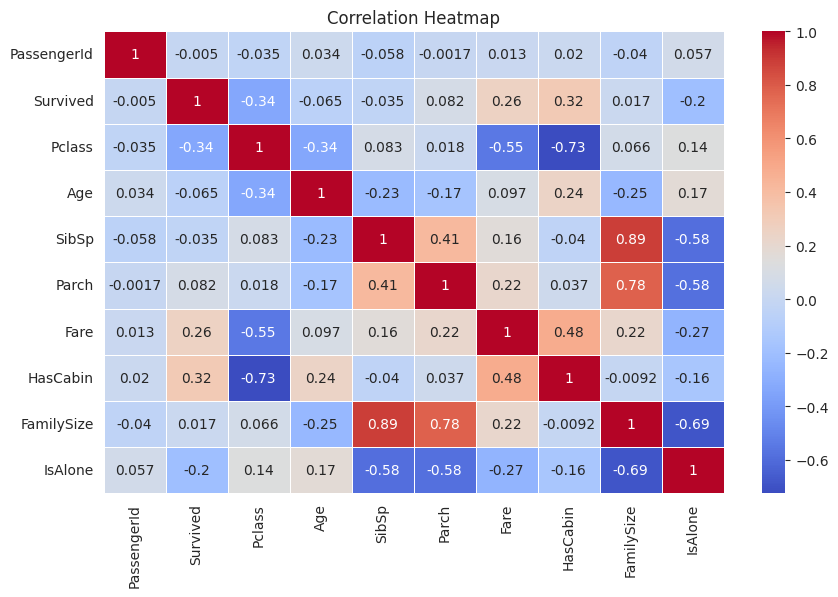


 KEY INSIGHTS
 Overall survival rate: 38.38%
 Female survival rate : 74.20%
 Male survival rate   : 18.89%
 1st‑class survival   : 62.96%
 3rd‑class survival   : 24.24%
 Travelling alone survival : 30.35%
 With family survival       : 50.56%


In [ ]:
# TITANIC DATA CLEANING & EXPLORATORY DATA ANALYSIS (EDA)

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a little bigger and cleaner
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

# 2. Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully!\n")
print(df.head())


# 3. Basic dataset overview

print("\n=== Shape (rows, columns) ===")
print(df.shape)

print("\n=== Column info & missing counts ===")
df.info()
print("\nMissing values per column:\n", df.isna().sum())

# 4. Data Cleaning

# 4.1 Handle 'Age' missing values → fill with median

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# 4.2 Handle 'Embarked' missing values → fill with mode (most frequent)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# 4.3 Create 'HasCabin' flag (1 if Cabin not null, else 0), then drop 'Cabin'

df['HasCabin'] = np.where(df['Cabin'].isna(), 0, 1)
df.drop(columns=['Cabin'], inplace=True)

# 4.4 Optional: drop 'Ticket' (often not useful for EDA clarity)

df.drop(columns=['Ticket'], inplace=True)

# Verify no remaining missing values

print("\nMissing values after cleaning:\n", df.isna().sum())


# 5. Feature Engineering

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1           # total people with passenger
df['IsAlone']    = np.where(df['FamilySize'] > 1, 0, 1)    # 1 if travelling alone


# 6. Univariate Analysis

# Helper function for bar charts of categorical features
def bar_count(col, title):
    sns.countplot(x=col, data=df)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Categorical variables
bar_count('Survived', 'Survival Count (0 = No, 1 = Yes)')
bar_count('Sex', 'Gender Distribution')
bar_count('Pclass', 'Passenger Class Distribution')
bar_count('Embarked', 'Embarked Port Distribution')
bar_count('IsAlone', 'Travelling Alone vs With Family')

# Numerical variables – histograms
def hist_numeric(col, bins=30):
    plt.hist(df[col].dropna(), bins=bins, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

hist_numeric('Age')
hist_numeric('Fare')


# 7. Bivariate Analysis

# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

# Age vs Survival (boxplot)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

# Fare vs Survival (violin plot)
sns.violinplot(x='Survived', y='Fare', data=df, inner='quartile')
plt.title('Fare vs Survival')
plt.show()


# 8. Multivariate / Correlation Analysis

corr_matrix = df.corr(numeric_only=True)      # seaborn >=0.13 requires numeric_only
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 9. Key Insights (printed text)
print("\n KEY INSIGHTS")
print(f" Overall survival rate: {df['Survived'].mean()*100:.2f}%")
print(f" Female survival rate : {df.loc[df['Sex']=='female','Survived'].mean()*100:.2f}%")
print(f" Male survival rate   : {df.loc[df['Sex']=='male','Survived'].mean()*100:.2f}%")
print(f" 1st‑class survival   : {df.loc[df['Pclass']==1,'Survived'].mean()*100:.2f}%")
print(f" 3rd‑class survival   : {df.loc[df['Pclass']==3,'Survived'].mean()*100:.2f}%")
print(f" Travelling alone survival : {df.loc[df['IsAlone']==1,'Survived'].mean()*100:.2f}%")
print(f" With family survival       : {df.loc[df['IsAlone']==0,'Survived'].mean()*100:.2f}%")